**importing necessary libraries for assessing, cleaning and visualizing data.**

In [1]:
#loading the neccessary libraries for analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json

#  Wrangling and Analyze Data

### Introduction
The dataset that I will be wrangling, analyzing and visualizing is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people’s dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because “they’re good dogs Brent.” WeRateDogs has over 4 million followers and has received international media coverage.

## Step1: Data Gathering

The data is collected from three sources:    
    - The twitter archive data is provided by udacity and its manually downloaded and updated to the         jupyter notebook.    
    - The image prediction data is downloaded programatically from udacity servers.    
    - The twitter jason data is downloaded from twitter using tweepy

In [2]:
#loading the downloaded file to jupyter
twitter = pd.read_csv('twitter-archive-enhanced.csv')
twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
#import requests

#url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
#response = requests.get(url)

#with open ('image-predictions.tsv', mode='wb') as file:
 #   file.write(response.content)

In [4]:
#downloading the data programatically
predictions = pd.read_csv('image-predictions.tsv',sep="\t")
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids =twitter.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json1.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 834209720923721728
Fail
323: 834167344700198914
Fail
324: 834089966724603904
Fail
325: 834086379323871233
Fail
326: 833863086058651648
Fail
327: 833826103416520705
Fail
328: 833732339549220864
Fail
329: 833722901757046785
Fail
330: 833479644947025920
Fail
331: 833124694597443584
Fail
332: 832998151111966721
Fail
333: 832769181346996225
Fail
334: 832757312314028032
Fail
335: 832682457690300417
Fail
336: 8326

Fail
614: 796865951799083009
Fail
615: 796759840936919040
Fail
616: 796563435802726400
Fail
617: 796484825502875648
Fail
618: 796387464403357696
Fail
619: 796177847564038144
Fail
620: 796149749086875649
Fail
621: 796125600683540480
Fail
622: 796116448414461957
Fail
623: 796080075804475393
Fail
624: 796031486298386433
Fail
625: 795464331001561088
Fail
626: 795400264262053889
Fail
627: 795076730285391872
Fail
628: 794983741416415232
Fail
629: 794926597468000259
Fail
630: 794355576146903043
Fail
631: 794332329137291264
Fail
632: 794205286408003585
Fail
633: 793962221541933056
Fail
634: 793845145112371200
Fail
635: 793614319594401792
Fail
636: 793601777308463104
Fail
637: 793500921481273345
Fail
638: 793286476301799424
Fail
639: 793271401113350145
Fail
640: 793256262322548741
Fail
641: 793241302385262592
Fail
642: 793226087023144960
Fail
643: 793210959003287553
Fail
644: 793195938047070209
Fail
645: 793180763617361921
Fail
646: 793165685325201412
Fail
647: 793150605191548928
Fail
648: 7931

Fail
913: 757596066325864448
Fail
914: 757400162377592832
Fail
915: 757393109802180609
Fail
916: 757354760399941633
Fail
917: 756998049151549440
Fail
918: 756939218950160384
Fail
919: 756651752796094464
Fail
920: 756526248105566208
Fail
921: 756303284449767430
Fail
922: 756288534030475264
Fail
923: 756275833623502848
Fail
924: 755955933503782912
Fail
925: 755206590534418437
Fail
926: 755110668769038337
Fail
927: 754874841593970688
Fail
928: 754856583969079297
Fail
929: 754747087846248448
Fail
930: 754482103782404096
Fail
931: 754449512966619136
Fail
932: 754120377874386944
Fail
933: 754011816964026368
Fail
934: 753655901052166144
Fail
935: 753420520834629632
Fail
936: 753398408988139520
Fail
937: 753375668877008896
Fail
938: 753298634498793472
Fail
939: 753294487569522689
Fail
940: 753039830821511168
Fail
941: 753026973505581056
Fail
942: 752932432744185856
Fail
943: 752917284578922496
Fail
944: 752701944171524096
Fail
945: 752682090207055872
Fail
946: 752660715232722944
Fail
947: 7525

Fail
1234: 712809025985978368
Fail
1235: 712717840512598017
Fail
1236: 712668654853337088
Fail
1237: 712438159032893441
Fail
1238: 712309440758808576
Fail
1239: 712097430750289920
Fail
1240: 712092745624633345
Fail
1241: 712085617388212225
Fail
1242: 712065007010385924
Fail
1243: 711998809858043904
Fail
1244: 711968124745228288
Fail
1245: 711743778164514816
Fail
1246: 711732680602345472
Fail
1247: 711694788429553666
Fail
1248: 711652651650457602
Fail
1249: 711363825979756544
Fail
1250: 711306686208872448
Fail
1251: 711008018775851008
Fail
1252: 710997087345876993
Fail
1253: 710844581445812225
Fail
1254: 710833117892898816
Fail
1255: 710658690886586372
Fail
1256: 710609963652087808
Fail
1257: 710588934686908417
Fail
1258: 710296729921429505
Fail
1259: 710283270106132480
Fail
1260: 710272297844797440
Fail
1261: 710269109699739648
Fail
1262: 710153181850935296
Fail
1263: 710140971284037632
Fail
1264: 710117014656950272
Fail
1265: 709918798883774466
Fail
1266: 709901256215666688
Fail
1267:

Fail
1525: 690597161306841088
Fail
1526: 690400367696297985
Fail
1527: 690374419777196032
Fail
1528: 690360449368465409
Fail
1529: 690348396616552449
Fail
1530: 690248561355657216
Fail
1531: 690021994562220032
Fail
1532: 690015576308211712
Fail
1533: 690005060500217858
Fail
1534: 689999384604450816
Fail
1535: 689993469801164801
Fail
1536: 689977555533848577
Fail
1537: 689905486972461056
Fail
1538: 689877686181715968
Fail
1539: 689835978131935233
Fail
1540: 689661964914655233
Fail
1541: 689659372465688576
Fail
1542: 689623661272240129
Fail
1543: 689599056876867584
Fail
1544: 689557536375177216
Fail
1545: 689517482558820352
Fail
1546: 689289219123089408
Fail
1547: 689283819090870273
Fail
1548: 689280876073582592
Fail
1549: 689275259254616065
Fail
1550: 689255633275777024
Fail
1551: 689154315265683456
Fail
1552: 689143371370250240
Fail
1553: 688916208532455424
Fail
1554: 688908934925697024
Fail
1555: 688898160958271489
Fail
1556: 688894073864884227
Fail
1557: 688828561667567616
Fail
1558:

Fail
1848: 675820929667219457
Fail
1849: 675798442703122432
Fail
1850: 675781562965868544
Fail
1851: 675740360753160193
Fail
1852: 675710890956750848
Fail
1853: 675707330206547968
Fail
1854: 675706639471788032
Fail
1855: 675534494439489536
Fail
1856: 675531475945709568
Fail
1857: 675522403582218240
Fail
1858: 675517828909424640
Fail
1859: 675501075957489664
Fail
1860: 675497103322386432
Fail
1861: 675489971617296384
Fail
1862: 675483430902214656
Fail
1863: 675432746517426176
Fail
1864: 675372240448454658
Fail
1865: 675362609739206656
Fail
1866: 675354435921575936
Fail
1867: 675349384339542016
Fail
1868: 675334060156301312
Fail
1869: 675166823650848770
Fail
1870: 675153376133427200
Fail
1871: 675149409102012420
Fail
1872: 675147105808306176
Fail
1873: 675146535592706048
Fail
1874: 675145476954566656
Fail
1875: 675135153782571009
Fail
1876: 675113801096802304
Fail
1877: 675111688094527488
Fail
1878: 675109292475830276
Fail
1879: 675047298674663426
Fail
1880: 675015141583413248
Fail
1881:

Fail
2131: 670093938074779648
Fail
2132: 670086499208155136
Fail
2133: 670079681849372674
Fail
2134: 670073503555706880
Fail
2135: 670069087419133954
Fail
2136: 670061506722140161
Fail
2137: 670055038660800512
Fail
2138: 670046952931721218
Fail
2139: 670040295598354432
Fail
2140: 670037189829525505
Fail
2141: 670003130994700288
Fail
2142: 669993076832759809
Fail
2143: 669972011175813120
Fail
2144: 669970042633789440
Fail
2145: 669942763794931712
Fail
2146: 669926384437997569
Fail
2147: 669923323644657664
Fail
2148: 669753178989142016
Fail
2149: 669749430875258880
Fail
2150: 669684865554620416
Fail
2151: 669683899023405056
Fail
2152: 669682095984410625
Fail
2153: 669680153564442624
Fail
2154: 669661792646373376
Fail
2155: 669625907762618368
Fail
2156: 669603084620980224
Fail
2157: 669597912108789760
Fail
2158: 669583744538451968
Fail
2159: 669573570759163904
Fail
2160: 669571471778410496
Fail
2161: 669567591774625800
Fail
2162: 669564461267722241
Fail
2163: 669393256313184256
Fail
2164:

our jason file contains data of different length so loading it leads to an error, 
we don't load our data at all.We need to solve this issue.

In [6]:
#creating two dictionaries to store our values
dict1 = {}
dict2 = {}

In [7]:
json.dumps([dict1, dict2])

'[{}, {}]'

In [10]:
json.loads(json.dumps([dict1, dict2]))

[{}, {}]

In [16]:
tweets = []
for line in open('E:\\Data Science\\project\\tweet-json.txt', 'r'):
    tweets.append(json.loads(line))

In [17]:
df_list = []
for file in tweets:
    id1 = file['id']
    retweet_count = file['retweet_count']
    favorite_count = file['favorite_count']   
    df_list.append({'tweet_id': id1,                    
                    'retweet_count': retweet_count,
                    'favorite_count': favorite_count,                    
                   })

In [18]:
df = pd.DataFrame(df_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])
df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Step 2: Assessing Data
We will use two types of analysis to assess our data:    
    1. Visual assessment, we would load our data and assess it using jupyter notebook. For additional          visualization we would use excel.    
    2 Programatic assessment, we would use pandas functions to perform programtic assesment

In [19]:
twitter.shape

(2356, 17)

In [20]:
predictions.shape

(2075, 12)

In [21]:
df.shape

(2354, 3)

In [22]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [23]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [25]:
twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [26]:
predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [27]:
df.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


#  Quality
### tweeter enhanced archive table
1. Sometimes the names of the dogs are incorrect like(all, my, not, a, an, the, by, such)
2. Some of the ratings are from retweets.
3. Sometimes the rating denominator is not equal to 10
4. Sometimes the rating numerator is extremely large
5. There is <a href= at the start and r-- at the end of the source column
6. Contains erronous data type of tweet_id
7. Some tweet_id do not have image predictions
8. Erronous data type timestamp, retweeted_status_timestamp are strings. They should
   be datetime.
9. The source column is duplicated.

# image prediction
1. Erronous data type tweet_id
2. p1, p2 and p3 has mixture of lower case and upper case at their start(can't clean)

# df table
1. Erronous data type tweet_id



## tidiness
1. The retweet_count and favorite_count in df should be in the twitter enhanced table
2. The doggo, floofer, pupper, and puppo columns in twitter_enhanced table should be represented under 
   a column named stage(the stage of the dog)




## Step 3: Cleaning

In [28]:
#lets create copies of the original data
twitter_clean = twitter.copy()
predictions_clean = predictions.copy()
df_clean = df.copy()

### Tidiness

#### 1.The retweet_count and favorite_count in df should be in the twitter enhanced table

##### Define 
merge retweet_count and favorite_count from df table with the twitter table.

##### Code

In [29]:
#use pd.merge to join the two tables
twitter_clean = pd.merge(twitter_clean, df, on=['tweet_id'], how='left')

##### Test

In [30]:
twitter_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,8853.0,39467.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,6514.0,33819.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,4328.0,25461.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,8964.0,42908.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,9774.0,41048.0


#### 2.The doggo, floofer, pupper, and puppo columns in twitter table should be represented under a column named stage(the stage of the dog)

##### Define
join the doggo, floofer, pupper and puppo to stage column

##### Code

In [31]:
twitter_clean['stage']=""
twitter_clean['stage'] = twitter_clean.doggo + twitter_clean.floofer +twitter_clean.pupper + twitter_clean.puppo

In [32]:
#we drop those columns that are combined to form stage
twitter_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis =1, inplace=True)

In [33]:
twitter_clean.stage.value_counts()

NoneNoneNoneNone        1976
NoneNonepupperNone       245
doggoNoneNoneNone         83
NoneNoneNonepuppo         29
doggoNonepupperNone       12
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: stage, dtype: int64

In [34]:
# since we have a lot of none in our data we need to replace it
twitter_clean['stage'] = twitter_clean['stage'].map(lambda x: x.replace("None",""))

*since some data that contained only none does not have a name, we define a function to name it*

In [35]:
# after we strip there are names that are going to be zero
# we then name them ungrouped
def stage_clean(stage):
    stage.strip()
    if len(stage) < 1:
        stage = 'ungrouped'
    return stage

In [36]:
twitter_clean['stage'] = twitter_clean['stage'].map(lambda x: stage_clean(x))

In [37]:
twitter_clean.stage.value_counts()

ungrouped       1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: stage, dtype: int64

In [38]:
#we need to separate doggopupper,doggopuppo and doggofloofer
twitter_clean.loc[twitter_clean.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
twitter_clean.loc[twitter_clean.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
twitter_clean.loc[twitter_clean.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

##### Test

In [39]:
twitter_clean.stage.value_counts()

ungrouped         1976
pupper             245
doggo               83
puppo               29
doggo, pupper       12
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: stage, dtype: int64

### Quality

#### Some tweet_id in twitter table do not have image predictions

##### Define
Remove tweet_ids that are in twitter_clean table but not in predictions_clean table

In [40]:
# using pandas isin function to find only ids in predictions
# updating the result to twitter_clean
twitter_clean = twitter_clean[twitter_clean.tweet_id.isin(predictions_clean.tweet_id)]

#### Test

In [41]:
twitter_clean.shape

(2075, 16)

#### some of the ratings are from retweets

##### Define
Remove ratings that are from retweets

##### Code

In [42]:
# assigns twitter_clean to where the retweeted_status is null, removing any retweet
twitter_clean = twitter_clean[twitter_clean.retweeted_status_id.isnull()]

##### Test

In [43]:
twitter_clean[~twitter_clean.retweeted_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,stage


#### sometimes the rating numerator is extremely large

#### Define
Replace the numerators which are greater than 17(where 17 is my maximum numerator) with 17.

In [44]:
def numerator_clean(numerator):
    if numerator > 17:
        numerator = 17    
    return numerator    

In [45]:
twitter_clean['rating_numerator'] = twitter_clean['rating_numerator'].apply(lambda x: numerator_clean(x))

##### Test

In [46]:
twitter_clean.rating_numerator.describe()

count    1994.000000
mean       10.599799
std         2.278044
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        17.000000
Name: rating_numerator, dtype: float64

#### sometimes the rating denominator is not equal to 10

##### Define
Replace rating_denominator for rows that have a rating_denominator that is not equal to 10

##### Code

In [47]:
#lets define a function that will change the rating_denominator whenever it is not equal to 10
#it only takes one argument -- which  is the denominator
def rating_denominator(denominator):
    if denominator != 10:
        denominator = 10
    return denominator

In [48]:
"""to change the values of rating_denominator we need to incorporate the use of apply function,
lambda function and the function we defined."""

twitter_clean['rating_denominator'] = twitter_clean['rating_denominator'].apply(lambda x: 
                                                                                rating_denominator(x))

##### Test

In [49]:
twitter_clean.rating_denominator.describe()

count    1994.0
mean       10.0
std         0.0
min        10.0
25%        10.0
50%        10.0
75%        10.0
max        10.0
Name: rating_denominator, dtype: float64

#### There is <a href= at the start and r-- at the end of the source column

##### Define
Remove <a href= and r-- from the source column

#### Code

In [50]:
#define a function to clean source column
def source_clean(source):#takes only one argument
    source = source.split(' ')[1]# splits the source column btween space
    return source.split('=')[1].replace('"','') # split the remaining source on = then replace double 
  #                                                 quotes with no space 

In [51]:
#use the apply function to clean the source column  
twitter_clean['source'] = twitter_clean['source'].apply(lambda x: source_clean(x))

##### Test

In [52]:
twitter_clean.source

0       http://twitter.com/download/iphone
1       http://twitter.com/download/iphone
2       http://twitter.com/download/iphone
3       http://twitter.com/download/iphone
4       http://twitter.com/download/iphone
                       ...                
2351    http://twitter.com/download/iphone
2352    http://twitter.com/download/iphone
2353    http://twitter.com/download/iphone
2354    http://twitter.com/download/iphone
2355    http://twitter.com/download/iphone
Name: source, Length: 1994, dtype: object

#### The source column is duplicated

##### Define 
Drop the source column

##### Code

In [53]:
#lets confirm the duplicates
sum(twitter_clean.source.duplicated())

1991

In [54]:
twitter_clean.drop('source', inplace=True, axis=1)

##### Test

In [55]:
twitter_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8853.0,39467.0,ungrouped
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6514.0,33819.0,ungrouped
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,4328.0,25461.0,ungrouped
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,8964.0,42908.0,ungrouped
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,9774.0,41048.0,ungrouped


#### Sometimes the names of the dogs are incorrect like(all, my, not, a, an, the, by, such)

##### Define
Replace the names of the dogs that are like: all, my, not, a, an, the, by, such with "Unnamed"
Also replace None in names to unnamed.

##### Code

In [56]:
# putting the names we need to change in a list
names = ["None", "all", "my", "not", "a", "an", "the", "by", "such"]
#defining a function to change the name whenever the name in the list is in the source column
def name_clean(name):
    if name in names:
        name = "Unnamed"
    return name

In [57]:
#changing the names in the name column by using apply, lambda and the function we defined
twitter_clean["name"] = twitter_clean['name'].apply(lambda x: name_clean(x))

##### Test

In [58]:
twitter_clean.name.value_counts().head(15)

Unnamed    619
Charlie     11
Oliver      10
Lucy        10
Cooper      10
Tucker       9
Penny        9
Sadie        8
Winston      8
Lola         7
Toby         7
Daisy        7
Bella        6
Stanley      6
Koda         6
Name: name, dtype: int64

#### Erronous data type timestamp, retweeted_status_timestamp are strings

##### Define
Convert data types in timestamp, retweeted_status_timestamp to datetime

##### Code

In [59]:
#using astype() to convert to new data type
twitter_clean.timestamp = twitter_clean.timestamp.astype('datetime64')
twitter_clean.retweeted_status_timestamp = twitter_clean.retweeted_status_timestamp.astype('datetime64')

##### Test

In [60]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    1994 non-null   int64         
 1   in_reply_to_status_id       23 non-null     float64       
 2   in_reply_to_user_id         23 non-null     float64       
 3   timestamp                   1994 non-null   datetime64[ns]
 4   text                        1994 non-null   object        
 5   retweeted_status_id         0 non-null      float64       
 6   retweeted_status_user_id    0 non-null      float64       
 7   retweeted_status_timestamp  0 non-null      datetime64[ns]
 8   expanded_urls               1994 non-null   object        
 9   rating_numerator            1994 non-null   int64         
 10  rating_denominator          1994 non-null   int64         
 11  name                        1994 non-null   object      

#### Erronous data type in tweet id

##### Define
Convert data type in tweet_id from interger to string

##### Code

In [61]:
twitter_clean.tweet_id = twitter_clean.tweet_id.astype(str)
predictions_clean.tweet_id = predictions_clean.tweet_id.astype(str)

##### Test

In [62]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    1994 non-null   object        
 1   in_reply_to_status_id       23 non-null     float64       
 2   in_reply_to_user_id         23 non-null     float64       
 3   timestamp                   1994 non-null   datetime64[ns]
 4   text                        1994 non-null   object        
 5   retweeted_status_id         0 non-null      float64       
 6   retweeted_status_user_id    0 non-null      float64       
 7   retweeted_status_timestamp  0 non-null      datetime64[ns]
 8   expanded_urls               1994 non-null   object        
 9   rating_numerator            1994 non-null   int64         
 10  rating_denominator          1994 non-null   int64         
 11  name                        1994 non-null   object      

In [63]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


## Step 4: Storing Data

In [64]:
#use pd.merge to join the two tables
twitter_clean = pd.merge(twitter_clean, predictions_clean, on=['tweet_id'], how='left')

In [65]:
twitter_clean.reset_index(drop=True,inplace=True)

In [66]:
twitter_clean.to_csv('twitter_archive_master1.csv', index=False)

## Step 5: Analyzing and Visualization

In [79]:
df = pd.read_csv('twitter_archive_master1.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### Research questions
we need to answer the following questions from our dataset:

1. Which are the most common dog names in our dataset?    
2. a. Which dog stage is most retweed on average?
   b.Does top retweed dog stages happen to be most liked?        
3. Do dogs that happen to have high ratings happen to be most liked?

### 1 Which are the most common dog names?

In [68]:
df_name = df[df["name"] != "Unnamed"]

In [69]:
common = df_name.name.value_counts().head(15)
common

Charlie    11
Oliver     10
Cooper     10
Lucy       10
Penny       9
Tucker      9
Winston     8
Sadie       8
Lola        7
Daisy       7
Toby        7
Koda        6
Bella       6
Jax         6
Stanley     6
Name: name, dtype: int64

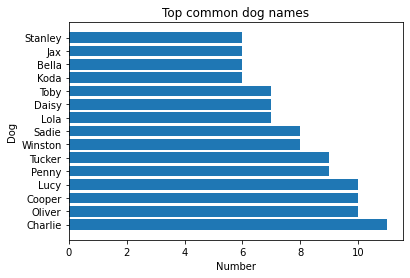

In [70]:
figsize=(16,16)
plt.barh(common.index,common)
plt.title('Top common dog names')
plt.xlabel('Number')
plt.ylabel('Dog');

###  2. a. Which dog stage is most retweed on average?
###  b.Does top retweed dog stages happen to be most liked

In [71]:
df_stage = df[df["stage"] != "ungrouped"]
retweet = df_stage.groupby('stage')[['favorite_count','retweet_count']].mean()#['retweet_count']
retweet.reset_index(inplace=True)

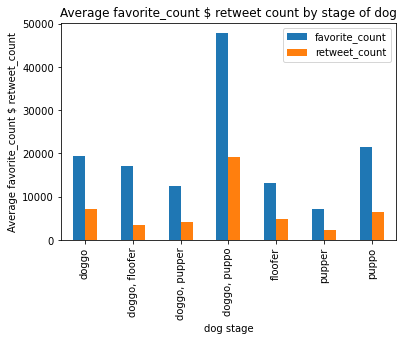

In [72]:
retweet.plot(x="stage", y=["favorite_count", 'retweet_count'], kind='bar')
plt.title('Average favorite_count $ retweet count by stage of dog')
plt.xlabel('dog stage')
plt.ylabel('Average favorite_count $ retweet_count');

### 3. Do dogs that happen to have high ratings most liked?

In [73]:
bin_values = [0.0, 10.0, 11.0, 12.0, 17.0]
bin_names =  ['lowly_rated', 'average_rated', 'top_rated', 'highly_rated']

In [74]:
#create popular level columns
df['rating_levels'] = pd.cut(df['rating_numerator'], bin_values, labels=bin_names) 
df.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating_levels
1048,704761120771465216,NaN,NaN,2016-03-01 20:11:59,This pupper killed this great white in an epic...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704761120...,13,...,Siamese_cat,0.202294,False,Chihuahua,0.100418,True,basenji,0.072096,True,highly_rated
628,763183847194451968,NaN,NaN,2016-08-10 01:23:03,This is Clark. He collects teddy bears. It's a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/763183847...,8,...,miniature_poodle,0.354674,True,toy_poodle,0.338642,True,teddy,0.155828,False,lowly_rated
1185,692187005137076224,NaN,NaN,2016-01-27 03:26:56,This is a rare Arctic Wubberfloof. Unamused by...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692187005...,12,...,Siberian_husky,0.810592,True,malamute,0.119745,True,Eskimo_dog,0.029265,True,top_rated


In [75]:
df_liked = df.groupby('rating_levels').mean().favorite_count
df_liked

rating_levels
lowly_rated       3469.691937
average_rated     6883.035354
top_rated        11266.313333
highly_rated     22322.215873
Name: favorite_count, dtype: float64

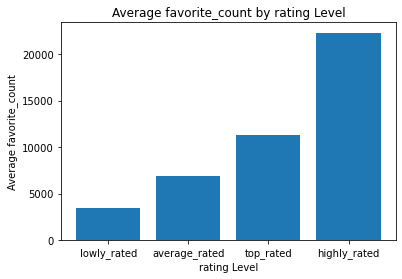

In [76]:
locations = [1, 2, 3, 4]
plt.bar(locations, df_liked, tick_label=df_liked.index)
plt.title('Average favorite_count by rating Level')
plt.xlabel('rating Level')
plt.ylabel('Average favorite_count');